<strong>Import libraries</strong>

In [1]:
import tensorflow as tf
from tensorflow import keras

import cv2
import numpy as np
import matplotlib.pyplot as plt

<strong>Import dataset</strong>

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print('Shape of a single data: {shape}'.format(shape=X_train[0].shape))

Shape of a single data: (28, 28)


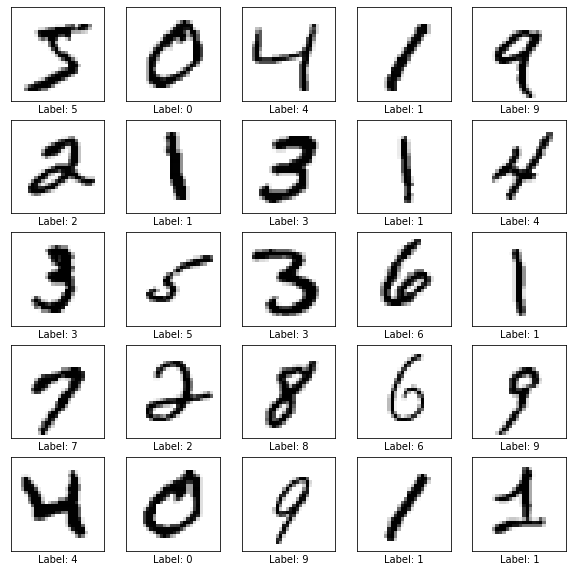

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel('Label: {label}'.format(label=y_train[i]))
plt.show()

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # Use the shape of a single data
model.add(keras.layers.Dense(128, activation='relu')) # First layer
model.add(keras.layers.Dense(64, activation='relu')) # Second layer
model.add(keras.layers.Dense(10, activation='softmax')) # Final layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 4.8729 - accuracy: 0.8068
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3097 - accuracy: 0.9218
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2004 - accuracy: 0.9447
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1564 - accuracy: 0.9546
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1327 - accuracy: 0.9616


In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 966us/step - loss: 0.1450 - accuracy: 0.9617


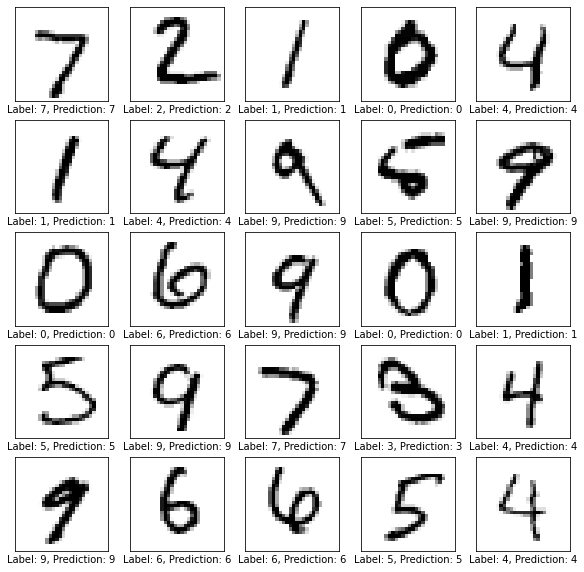

In [7]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel('Label: {label}, Prediction: {pred}'.format(label=y_test[i], pred=np.argmax(y_pred[i])))
plt.show()